In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.DataFrame({"Age" : [28,26,30,15,31,59,60,
                              16,24,56,14,34]})
df

,Age
0,28
1,26
2,30
3,15
4,31
5,59
6,60
7,16
8,24
9,56


In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans_model = KMeans(n_clusters = 3, 
                      random_state = 0,
                      n_init = 20)
kmeans_model.fit(df)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=20, random_state=0)

In [57]:
kmeans_model.labels_

array([2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2])

In [58]:
df["Labels"] = kmeans_model.labels_
df

,Age,Labels
0,28,2
1,26,2
2,30,2
3,15,1
4,31,2
5,59,0
6,60,0
7,16,1
8,24,2
9,56,0


In [59]:
kmeans_model.cluster_centers_

array([[58.33333333],
       [15.        ],
       [28.83333333]])

In [60]:
# inertia/WCSS

In [61]:
kmeans_model.inertia_   #WCSS mostly used to decide the optimal value of K

75.50000000000001

In [62]:
# K =1 # inertia/WCSS
# K = 2 # WCSS
# K = 3   # WCSS
# .
# .
# K = 10

In [63]:
from sklearn.metrics import silhouette_score

In [64]:
silhouette_score(df, kmeans_model.labels_)

0.780441923950178

In [65]:
#df = pd.read_clipboard()
#df.head()

In [66]:
# scipy
from scipy.cluster.hierarchy import dendrogram,cophenet,linkage


In [67]:
Z = linkage(df, method="single")
Z

array([[ 2.        ,  4.        ,  1.        ,  2.        ],
       [ 3.        ,  7.        ,  1.        ,  2.        ],
       [10.        , 13.        ,  1.        ,  3.        ],
       [ 5.        ,  6.        ,  1.        ,  2.        ],
       [ 0.        ,  1.        ,  2.        ,  2.        ],
       [12.        , 16.        ,  2.        ,  4.        ],
       [ 8.        , 17.        ,  2.        ,  5.        ],
       [11.        , 18.        ,  3.        ,  6.        ],
       [ 9.        , 15.        ,  3.        ,  3.        ],
       [14.        , 19.        ,  8.06225775,  9.        ],
       [20.        , 21.        , 22.09072203, 12.        ]])

In [68]:
# 0 P1
# 1 P2
# 2 P3
# 3 P4
# 4 P5
# 5 P1P5    2
# 6 P1P5P3  3
# 7 P2P4    2
# 8 P1P5P3P2P4 5


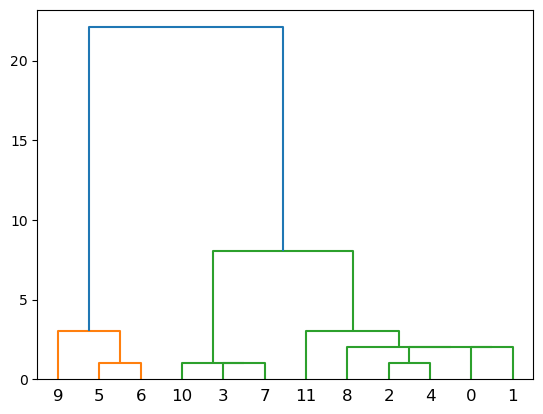

In [69]:
dendrogram(Z)
plt.show()

In [70]:
cophenet(Z)

array([ 2.        ,  2.        ,  8.06225775,  2.        , 22.09072203,
       22.09072203,  8.06225775,  2.        , 22.09072203,  8.06225775,
        3.        ,  2.        ,  8.06225775,  2.        , 22.09072203,
       22.09072203,  8.06225775,  2.        , 22.09072203,  8.06225775,
        3.        ,  8.06225775,  1.        , 22.09072203, 22.09072203,
        8.06225775,  2.        , 22.09072203,  8.06225775,  3.        ,
        8.06225775, 22.09072203, 22.09072203,  1.        ,  8.06225775,
       22.09072203,  1.        ,  8.06225775, 22.09072203, 22.09072203,
        8.06225775,  2.        , 22.09072203,  8.06225775,  3.        ,
        1.        , 22.09072203, 22.09072203,  3.        , 22.09072203,
       22.09072203, 22.09072203, 22.09072203,  3.        , 22.09072203,
       22.09072203,  8.06225775, 22.09072203,  1.        ,  8.06225775,
       22.09072203,  8.06225775,  3.        , 22.09072203, 22.09072203,
        8.06225775])

In [71]:
# Agglomerative
# Other linkage

In [72]:
from sklearn.metrics import pairwise_distances

In [73]:
ec_d = pairwise_distances(df)
ec_d

array([[ 0.        ,  2.        ,  2.        , 13.03840481,  3.        ,
        31.06444913, 32.06243908, 12.04159458,  4.        , 28.0713377 ,
        14.03566885,  6.        ],
       [ 2.        ,  0.        ,  4.        , 11.04536102,  5.        ,
        33.06055051, 34.05877273, 10.04987562,  2.        , 30.06659276,
        12.04159458,  8.        ],
       [ 2.        ,  4.        ,  0.        , 15.03329638,  1.        ,
        29.06888371, 30.06659276, 14.03566885,  6.        , 26.07680962,
        16.03121954,  4.        ],
       [13.03840481, 11.04536102, 15.03329638,  0.        , 16.03121954,
        44.01136217, 45.01110974,  1.        ,  9.05538514, 41.01219331,
         1.        , 19.02629759],
       [ 3.        ,  5.        ,  1.        , 16.03121954,  0.        ,
        28.0713377 , 29.06888371, 15.03329638,  7.        , 25.07987241,
        17.02938637,  3.        ],
       [31.06444913, 33.06055051, 29.06888371, 44.01136217, 28.0713377 ,
         0.        ,  

In [74]:
act_d = ec_d[np.triu_indices(5,k=1 )]
act_d

array([ 2.        ,  2.        , 13.03840481,  3.        ,  4.        ,
       11.04536102,  5.        , 15.03329638,  1.        , 16.03121954])

In [75]:
np.corrcoef(cophenet(Z),act_d)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 66 and the array at index 1 has size 10

In [76]:
cophenet(Z,act_d)

ValueError: operands could not be broadcast together with shapes (10,) (66,) 